                                                                          IMPORTING DATAET

In [ ]:
import pandas as pd
df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


                                                                          CORRELATION HEATMAP

In [ ]:
# IDENTIFYING RELATIONSHIPS BETWEEN NUMERICAL FEATURES AND CHECK MULTICOLLINARITY

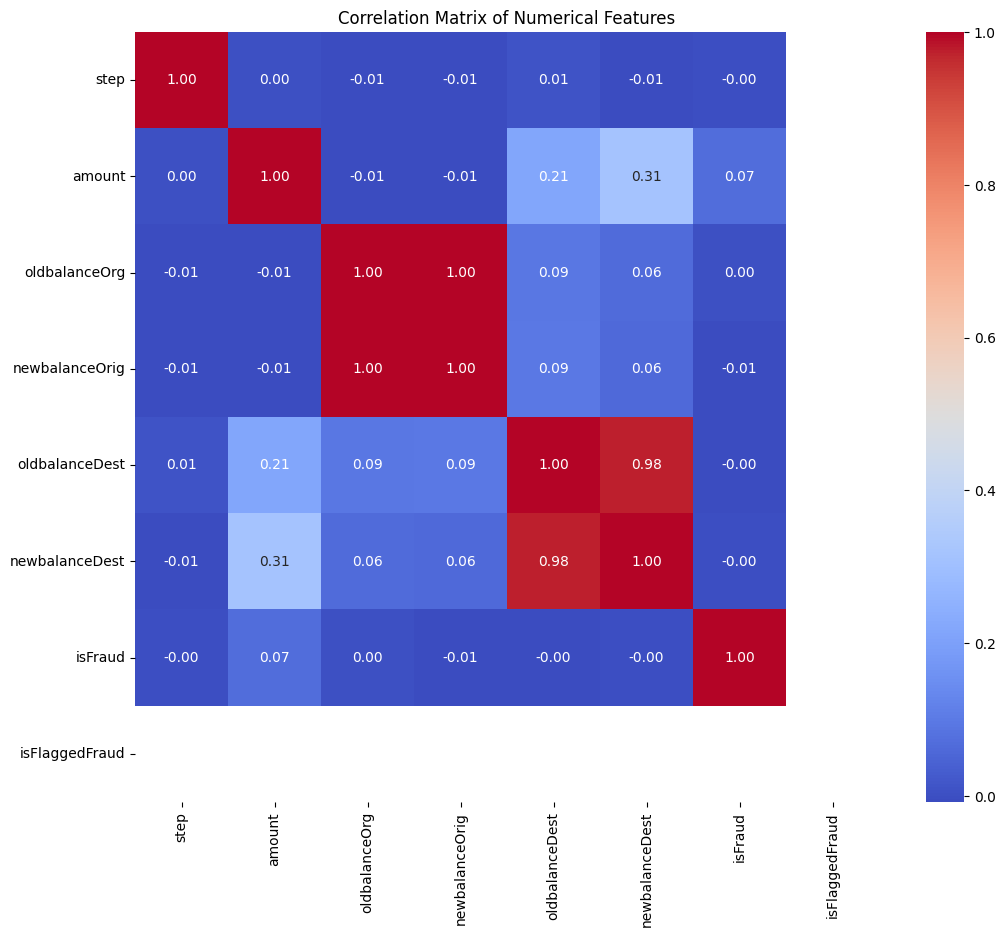

Highly Correlated Feature Pairs:
('newbalanceDest', 'oldbalanceDest')
('newbalanceOrig', 'oldbalanceOrg')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


numerical_features = df.select_dtypes(include=['number'])


correlation_matrix = numerical_features.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


threshold = 0.8
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_features.add((colname_i, colname_j))

if highly_correlated_features:
  print("Highly Correlated Feature Pairs:")
  for pair in highly_correlated_features:
      print(pair)
else:
  print("No highly correlated feature pairs found above the threshold.")

                                                                          CLASS DISTRIBUTION (FRAUD VS NON-FRAUD)

In [ ]:
# VISUALIZE THE IMBALACE IN THE DATA SET BETWEEN FRAUD AND NON FRAUD TRANSACTION(IMBALANCE CHECK)

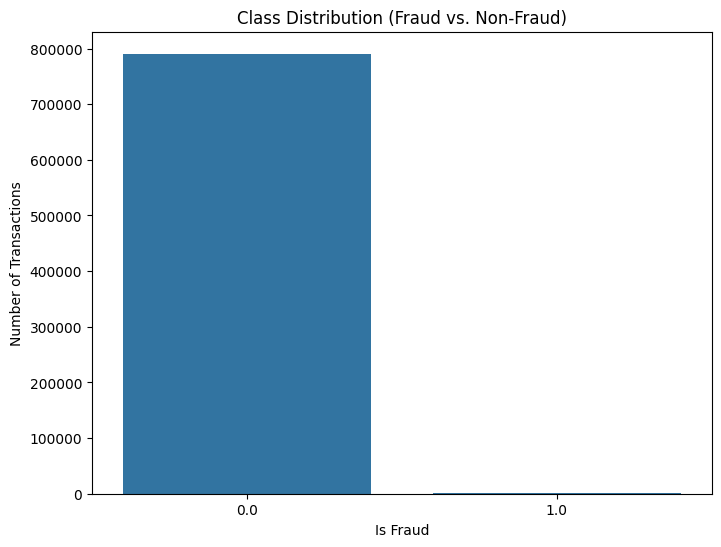

Number of Non-Fraud Transactions: 790684
Number of Fraud Transactions: 458


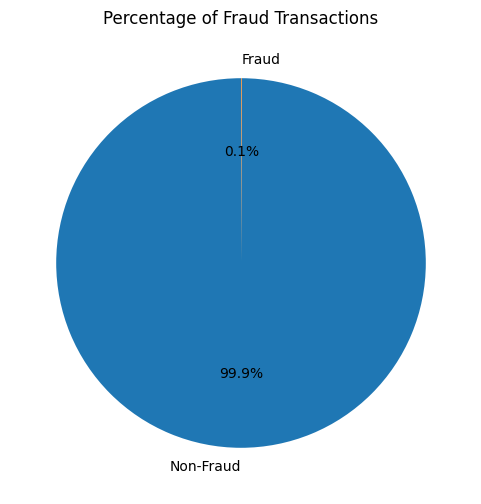

In [ ]:
class_counts = df['isFraud'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=df)
plt.title('Class Distribution (Fraud vs. Non-Fraud)')
plt.xlabel('Is Fraud')
plt.ylabel('Number of Transactions')
plt.show()

print("Number of Non-Fraud Transactions:", class_counts[0])
print("Number of Fraud Transactions:", class_counts[1])

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Fraud Transactions')
plt.show()

                                                                          TRANSACTION AMOUNT DISTRIBUTION

In [ ]:
# UNDERSTAND THE DISTRIBUTION  OF TRANSACTION AMOUNT AND DETECT OUTLIERS

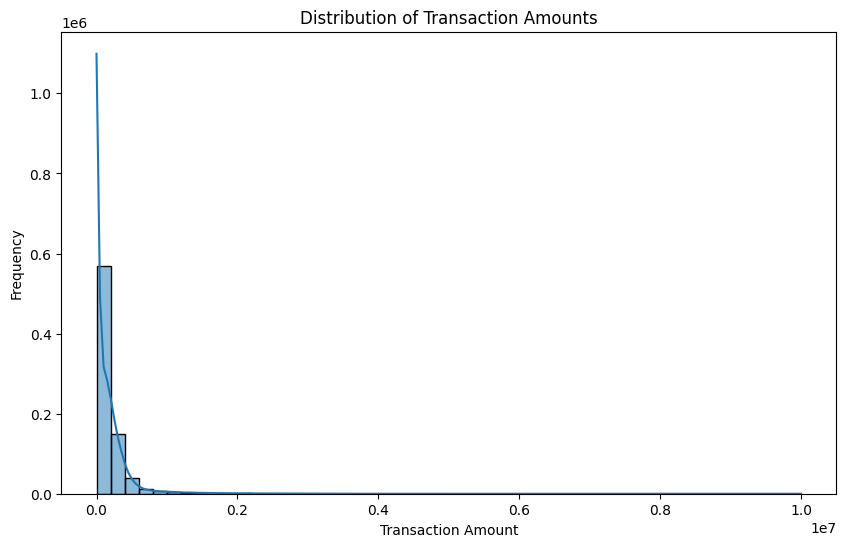

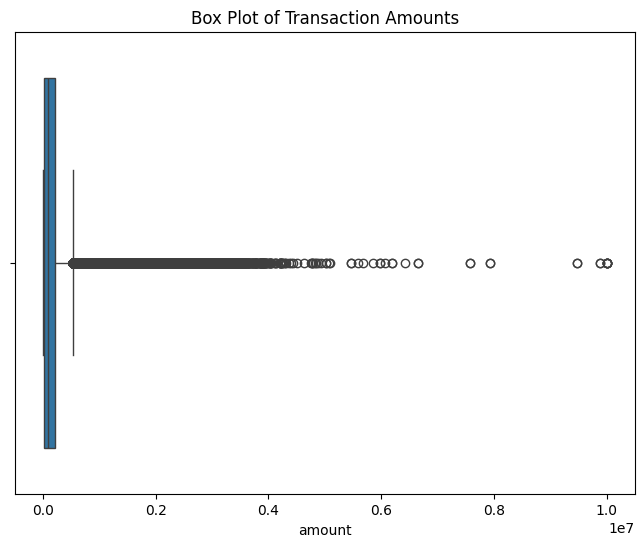

Number of outliers in transaction amount: 40376


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x=df['amount'])
plt.title('Box Plot of Transaction Amounts')
plt.show()


Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
print(f"Number of outliers in transaction amount: {len(outliers)}")

                                                                          TIME SERIES PLOT OF TRANSACTION

In [ ]:
# DETECT PATTERN IN TRANSACTION VOLUME OVER TIME

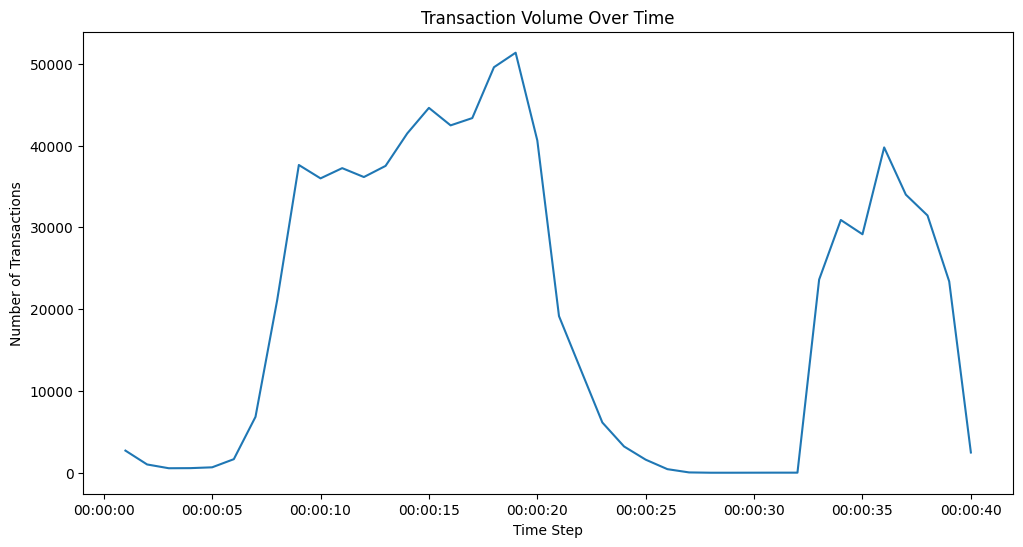

In [ ]:
transaction_counts = df.groupby('step')['step'].count()


plt.figure(figsize=(12, 6))
plt.plot(transaction_counts.index, transaction_counts.values)
plt.xlabel('Time Step')
plt.ylabel('Number of Transactions')
plt.title('Transaction Volume Over Time')
plt.show()


                                                                          FRAUD COUNT BY TRANSACTION TYPE

In [ ]:
# VISUALIZE FRAUD CASES ACROSS DIFFERENT TRANSACTION TYPES EG CREDIT , DEBIT, PURCHASE

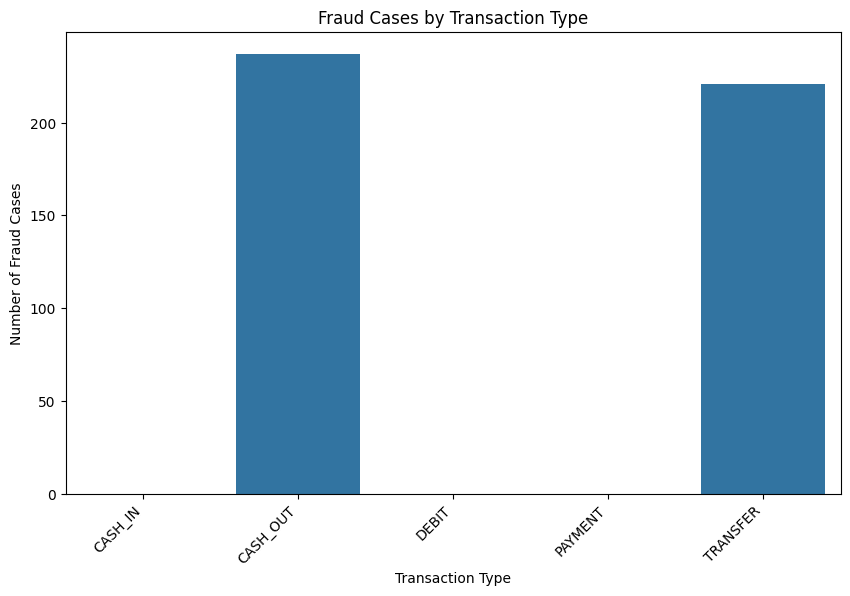

In [ ]:
fraud_by_type = df.groupby('type')['isFraud'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values)
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraud Cases')
plt.title('Fraud Cases by Transaction Type')
plt.xticks(rotation=45, ha='right')
plt.show()

                                                                          HEATMAP OF MISSING DATA

In [ ]:
# VISUALIZE MISSING DATA TO UNDERSTAND WHERE IMPUTATION PR DATA CLEANING IS NEEDED

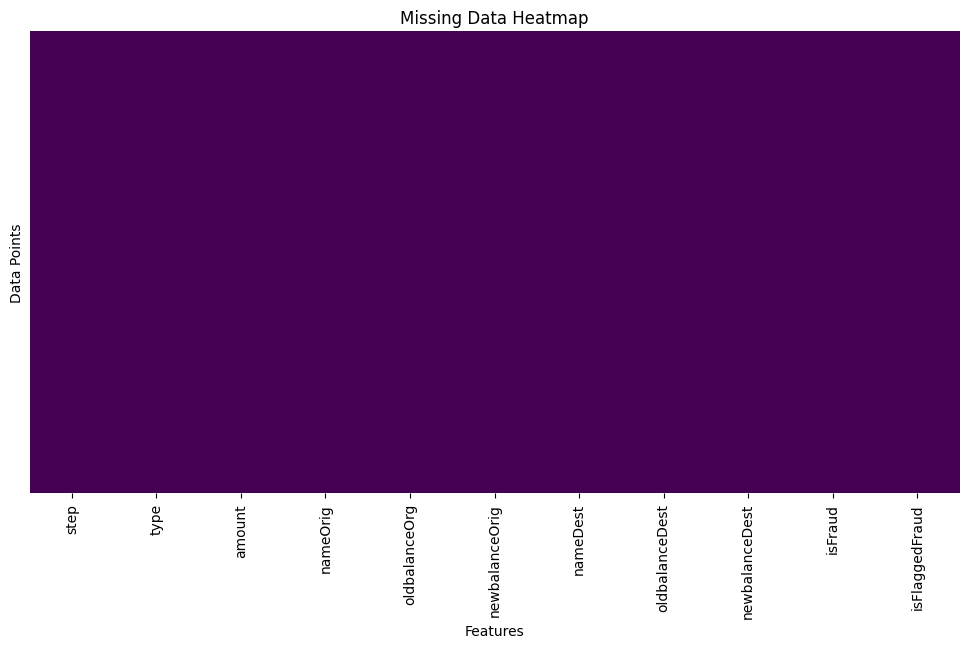

Percentage of missing values for each feature:
step              0.000000
type              0.000000
amount            0.000000
nameOrig          0.000000
oldbalanceOrg     0.000000
newbalanceOrig    0.000126
nameDest          0.000126
oldbalanceDest    0.000126
newbalanceDest    0.000126
isFraud           0.000126
isFlaggedFraud    0.000126
dtype: float64


In [ ]:
missing_percentage = df.isnull().mean() * 100

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

print("Percentage of missing values for each feature:")
print(missing_percentage)

                                                                          3D Scatter Plot for Visualizing Multi-Dimensional Data

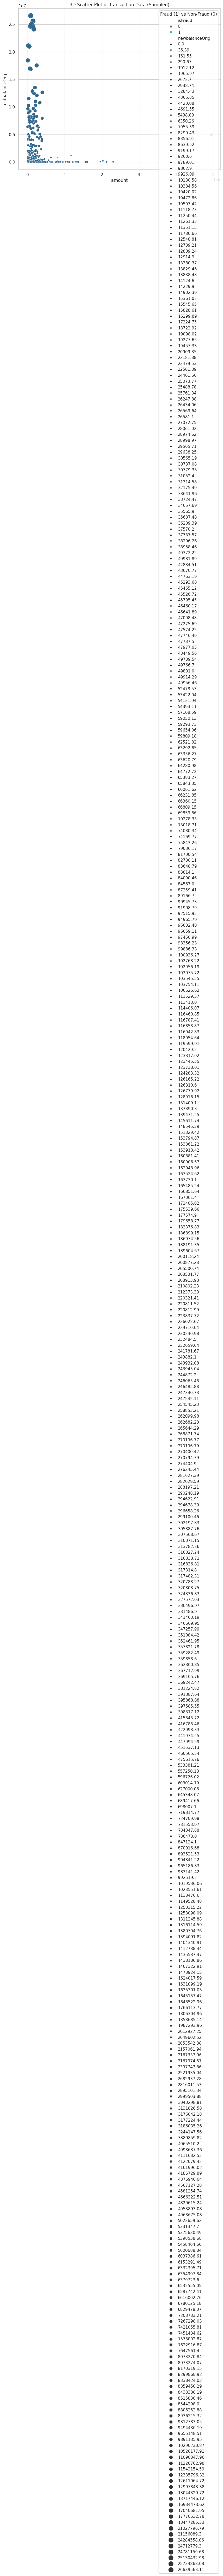

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sample_size = 1000
df_sample = df.sample(n=sample_size, random_state=42)


features_for_plot = ['amount', 'oldbalanceOrg', 'newbalanceOrig']


sns.set(style="whitegrid")


plt.figure(figsize=(10, 8))


scatter = sns.scatterplot(x=df_sample[features_for_plot[0]],
                          y=df_sample[features_for_plot[1]],
                          hue=df_sample['isFraud'],
                          size=df_sample[features_for_plot[2]],
                          sizes=(20, 200),
                          palette='viridis',
                          legend="full")


plt.xlabel(features_for_plot[0])
plt.ylabel(features_for_plot[1])
plt.title('3D Scatter Plot of Transaction Data (Sampled)')


plt.legend(title="Fraud (1) vs Non-Fraud (0)", loc='upper right')

plt.show()


                                                                        Heatmap of Time-of-Day vs Transaction Type

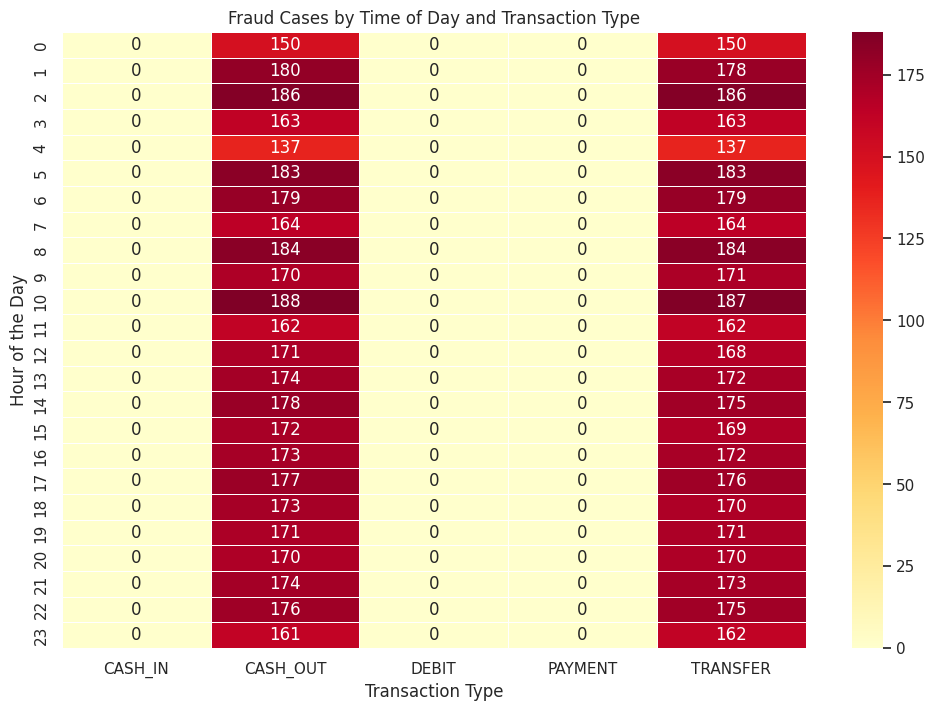

In [ ]:
df['hour'] = df['step'] % 24


fraud_heatmap_data = df.pivot_table(index='hour', columns='type', values='isFraud', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(fraud_heatmap_data, annot=True, fmt=".0f", cmap='YlOrRd', linewidths=.5)
plt.title('Fraud Cases by Time of Day and Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Hour of the Day')
plt.show()

                                                                          DISTRIBUTION OF TRANSACTION TYPE

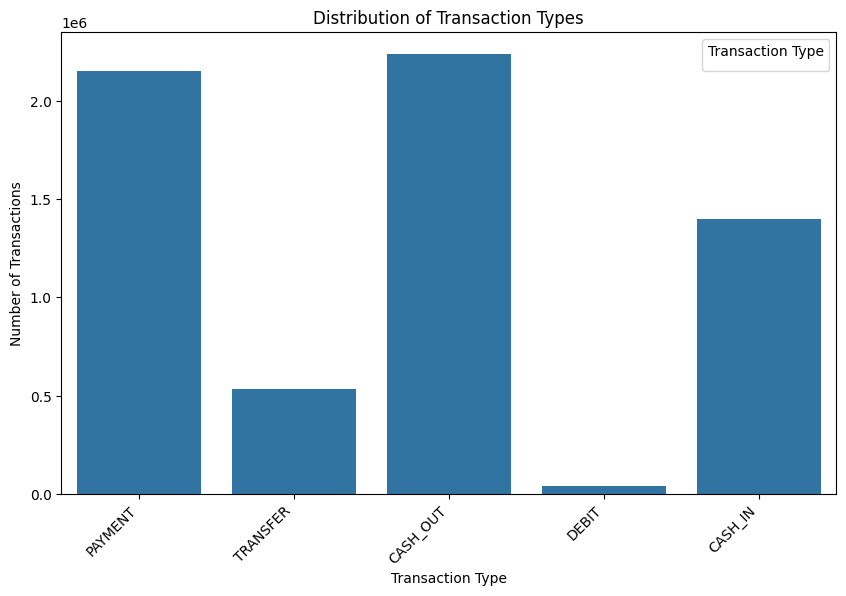

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right')
plt.show()

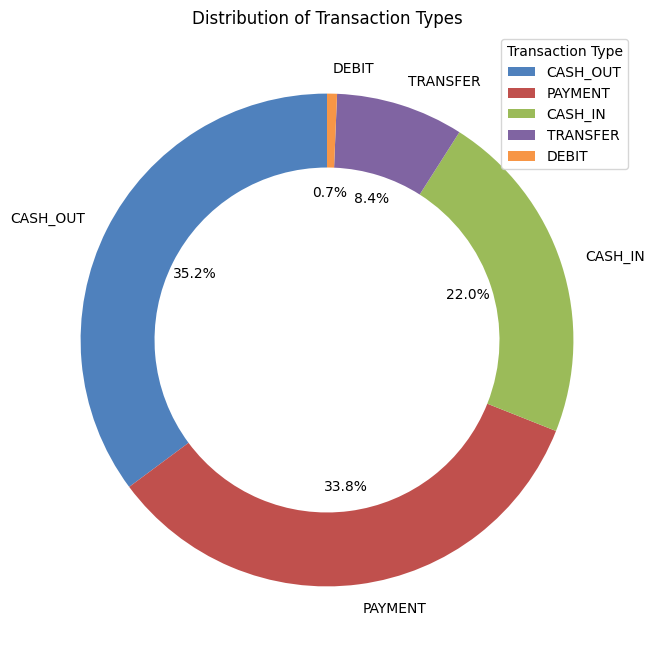

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


transaction_counts = df['type'].value_counts()

labels = transaction_counts.index
sizes = transaction_counts.values

colors = ['#4f81bd', '#c0504d', '#9bbb59', '#8064a2', '#f79646']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))


plt.legend(labels, title="Transaction Type", loc="upper right")


plt.title('Distribution of Transaction Types')


plt.show()
